In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = glob.glob('./results/**/summary.csv', recursive = True)
files

['./results\\mimic2\\summary.csv',
 './results\\mimic_explain_classifier\\summary.csv',
 './results\\vdem_low2mid\\summary.csv']

In [3]:
file = files[0]

In [4]:
df = pd.read_csv(file, index_col=0)
df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
df['Error (%)'] = 100 - df['explanation_accuracy_mean']
df['Complexity'] = df['explanation_complexity_mean']
df['OOB'] = [0, 0, 0, 1, 1, 1]
df

,model_accuracy_mean,explanation_accuracy_mean,explanation_fidelity_mean,explanation_complexity_mean,elapsed_time_mean,explanation_consistency_mean,model_accuracy_sem,explanation_accuracy_sem,explanation_fidelity_sem,explanation_complexity_sem,elapsed_time_sem,explanation_consistency_sem,Error (%),Complexity,OOB
brl,86.149940,85.923951,1.00000,20.7,495.594809,0.283333,0.005085,0.004582,0.000000,4.077172,7.128592,1.850372e-17,14.076049,20.7,0
pruning,86.598743,85.079667,0.96228,5.1,13.319946,0.510000,0.003019,0.004809,0.008124,0.348010,0.303130,0.000000e+00,14.920333,5.1,0
psi,84.009078,82.826128,0.84628,2.6,8.813209,0.371429,0.000894,0.006595,0.006734,0.163299,0.148552,0.000000e+00,17.173872,2.6,0
tree-3,86.486066,86.486066,1.00000,6.0,0.005950,0.500000,0.003959,0.003959,0.000000,0.447214,0.000501,0.000000e+00,13.513934,6.0,1
tree,79.557545,79.557545,1.00000,1342.6,0.016373,0.815033,0.007968,0.007968,0.000000,16.940550,0.000643,3.700743e-17,20.442455,1342.6,1
weights,0.853615,82.094204,0.87836,23.4,266.215391,0.260000,0.007811,0.013768,0.021187,11.200397,166.899079,1.850372e-17,17.905796,23.4,1


In [5]:
def is_pareto_efficient_dumb(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        is_efficient[i] = np.all(np.any(costs[:i]>c, axis=1)) and np.all(np.any(costs[i+1:]>c, axis=1))
    return is_efficient

In [6]:
is_efficient = is_pareto_efficient_dumb(df[['Complexity', 'Error (%)']].values)
is_efficient

array([False,  True,  True,  True, False, False])

In [7]:
is_efficient_sorted_idx = df['Complexity'][is_efficient].argsort().values
is_efficient_sorted_idx

array([1, 0, 2], dtype=int64)

In [8]:
is_efficient_sorted_x = df['Complexity'][is_efficient][is_efficient_sorted_idx].values
is_efficient_sorted_x

array([2.6, 5.1, 6. ])

In [9]:
is_efficient_sorted_y = df['Error (%)'][is_efficient][is_efficient_sorted_idx].values
is_efficient_sorted_y

array([17.17387164, 14.92033264, 13.51393385])

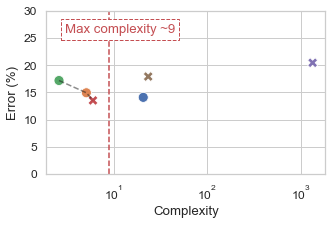

In [10]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
plt.figure(figsize=[5, 3])
plt.plot([9, 9], [0, 30], c='r', linestyle='--', alpha=1)
plt.text(3, 26, 'Max complexity ~9', {'color':  'r', 'backgroundcolor': 'w', 
                                       'bbox': {'fc': 'w', 'ec': 'r', 'ls': '--'}})
sns.lineplot(x=is_efficient_sorted_x, y=is_efficient_sorted_y, color='k', linestyle='--', alpha=0.5)
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=100, legend=False)
plt.xscale('log')
plt.ylim([0, 30])
plt.show()

In [11]:
file.split('\\')[1]

'mimic2'

./results\mimic2\summary.csv


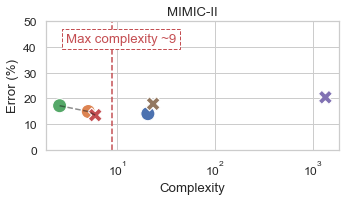

./results\mimic_explain_classifier\summary.csv


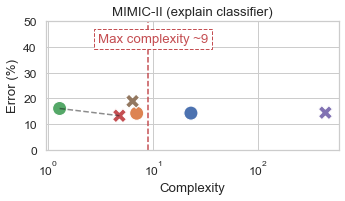

./results\vdem_low2mid\summary.csv


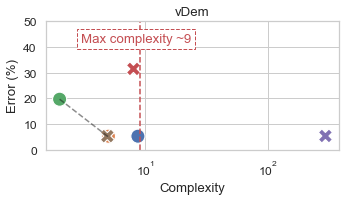

In [13]:
titles = ['MIMIC-II', 'MIMIC-II (explain classifier)', 'vDem']
for i, (file, title) in enumerate(zip(files, titles)):
    df = pd.read_csv(file, index_col=0)
    
    if file == './results\\vdem_low2mid\\summary.csv':
        df.rename(columns = {'model_accuracy_top_mean': 'model_accuracy_mean'}, inplace = True) 
        df.rename(columns = {'model_accuracy_top_sem': 'model_accuracy_sem'}, inplace = True) 
    print(file)
    df.iloc[:-1, 0] = df.iloc[:-1, 0] * 100
    df['explanation_accuracy_mean'] = df['explanation_accuracy_mean'] * 100
    df['Error (%)'] = 100 - df['explanation_accuracy_mean']
    df['Complexity'] = df['explanation_complexity_mean']
    df['OOB'] = [0, 0, 0, 1, 1, 1]
    
    is_efficient = is_pareto_efficient_dumb(df[['Complexity', 'Error (%)']].values)
    is_efficient_sorted_idx = df['Complexity'][is_efficient].argsort().values
    is_efficient_sorted_x = df['Complexity'][is_efficient][is_efficient_sorted_idx].values
    is_efficient_sorted_y = df['Error (%)'][is_efficient][is_efficient_sorted_idx].values
    
    plt.figure(figsize=[5, 3])
    plt.title(title)
    plt.plot([9, 9], [0, 50], c='r', linestyle='--')
    plt.text(3, 42, 'Max complexity ~9', {'color':  'r', 'backgroundcolor': 'w', 
                                           'bbox': {'fc': 'w', 'ec': 'r', 'ls': '--'}})
    sns.lineplot(x=is_efficient_sorted_x, y=is_efficient_sorted_y, color='k', linestyle='--', alpha=0.5)
    sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue=df.index, style='OOB', s=200, legend=False)
    plt.xscale('log')
    plt.ylim([0, 50])
    plt.tight_layout()
    name = file.split('\\')[1]
    plt.savefig(f"./results/{name}.png")
    plt.savefig(f"./results/{name}.pdf")
    plt.show()
    

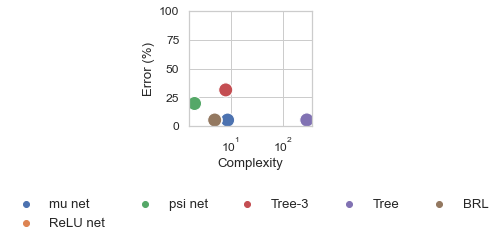

In [15]:
import matplotlib as mpl
df['Method'] = ['mu net', 'ReLU net', 'psi net', 'Tree-3', 'Tree', 'BRL']
plt.figure(figsize=[5, 8])
sns.scatterplot(data=df, x='Complexity', y='Error (%)', hue='Method', s=200)
plt.xscale('log')
plt.ylim([0, 100])
plt.legend(loc='lower center', fontsize='medium', ncol=5, frameon=False, 
           bbox_to_anchor=(0.5, -1),fancybox=False, shadow=False)
plt.tight_layout()
plt.savefig('./results/legend.png', bbox_inches=mpl.transforms.Bbox([[-0.8, 4.7], [5.9, 4.9]]))
plt.savefig('./results/legend.pdf', bbox_inches=mpl.transforms.Bbox([[-0.8, 4.7], [5.9, 4.9]]))
plt.show()